<a href="https://colab.research.google.com/github/PX2145-2025/week-10-b-Callum-mason68/blob/main/fourier_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft

def Spectrum1(x, Fs):
    """
    One-sided amplitude spectrum of x(t)
    """
    N = len(x)
    frq = (float(Fs)/N) * np.arange(0, N//2 + 1)
    X = fft(x) / N
    X = X[0:N//2 + 1]
    return frq, X


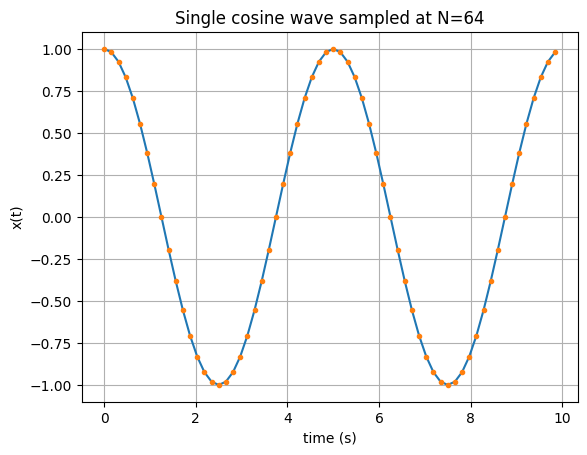

In [3]:
# Exercise 1
N = 64
tau = 10.0
t = np.linspace(0, tau, N, endpoint=False)

f = 0.2
x = np.cos(2*np.pi*f*t)

plt.plot(t, x)
plt.plot(t, x, '.')
plt.title(f'Single cosine wave sampled at N={N}')
plt.xlabel('time (s)')
plt.ylabel('x(t)')
plt.grid(True)
plt.show()


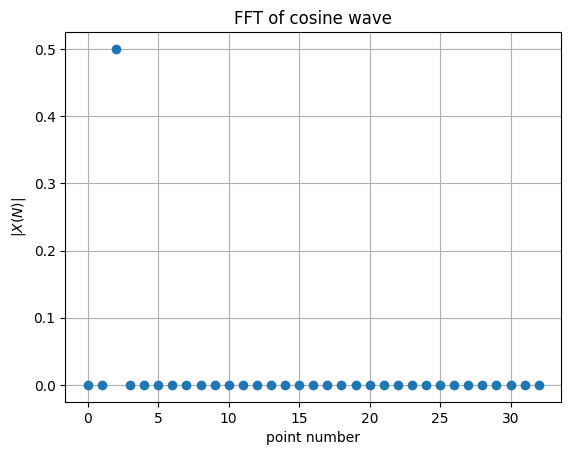

In [4]:
# Exercise 2
X = fft(x) / N

plt.plot(np.abs(X[0:N//2 + 1]), 'o')
plt.title('FFT of cosine wave')
plt.xlabel('point number')
plt.ylabel(r'$|X(N)|$')
plt.grid(True)
plt.show()


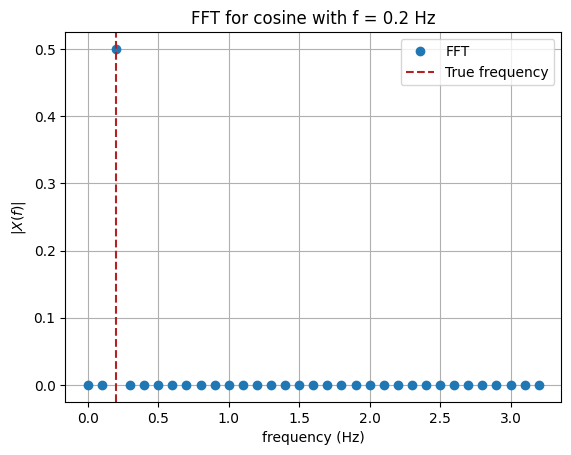

In [5]:
# Exercise 3
Fs = N / tau
frq, X = Spectrum1(x, Fs)

plt.plot(frq, np.abs(X), 'o', label='FFT')
plt.axvline(f, ls='--', color='firebrick', label='True frequency')
plt.title(f'FFT for cosine with f = {f} Hz')
plt.xlabel('frequency (Hz)')
plt.ylabel(r'$|X(f)|$')
plt.legend()
plt.grid(True)
plt.show()


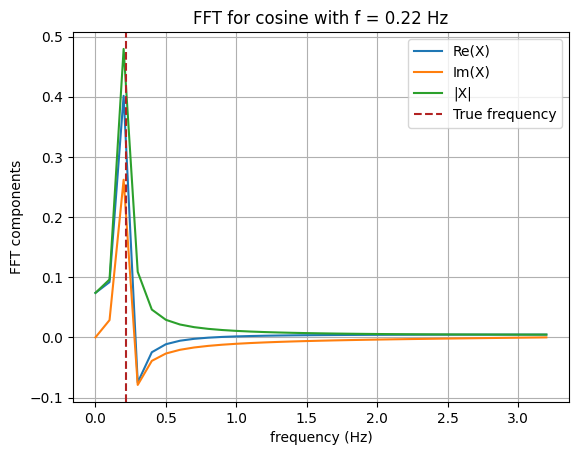

In [6]:
# Exercise 4
f = 0.22
x = np.cos(2*np.pi*f*t)

frq, X = Spectrum1(x, Fs=N/tau)

plt.plot(frq, np.real(X), label='Re(X)')
plt.plot(frq, np.imag(X), label='Im(X)')
plt.plot(frq, np.abs(X), label='|X|')
plt.axvline(f, ls='--', color='firebrick', label='True frequency')
plt.title(f'FFT for cosine with f = {f} Hz')
plt.xlabel('frequency (Hz)')
plt.ylabel('FFT components')
plt.legend()
plt.grid(True)
plt.show()


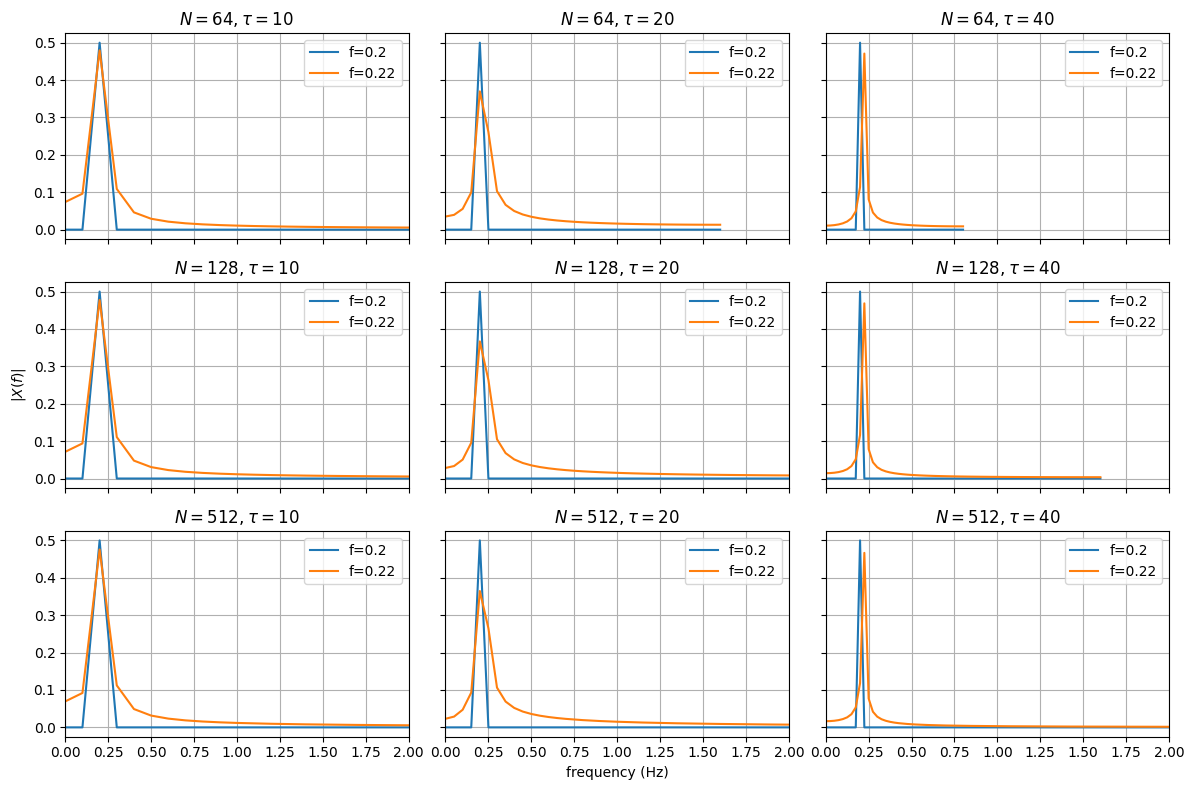

In [7]:
# Exercise 5
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(12, 8))

for i, N in enumerate([64, 128, 512]):
    for j, tau in enumerate([10, 20, 40]):
        t = np.linspace(0, tau, N, endpoint=False)

        for f in [0.2, 0.22]:
            x = np.cos(2*np.pi*f*t)
            frq, X = Spectrum1(x, Fs=N/tau)
            ax[i, j].plot(frq, np.abs(X), label=f'f={f}')

        ax[i, j].set_title(rf'$N={N}, \tau={tau}$')
        ax[i, j].grid(True)
        ax[i, j].legend()

ax[2, 1].set_xlabel('frequency (Hz)')
ax[1, 0].set_ylabel(r'$|X(f)|$')
plt.xlim(0, 2)
plt.tight_layout()
plt.show()


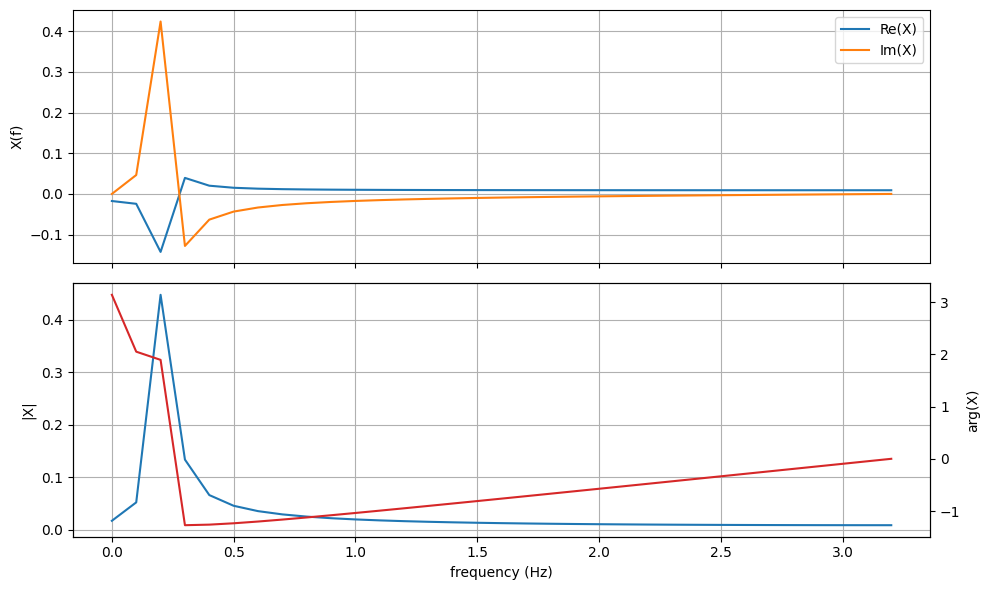

In [8]:
# Exercise 6
N = 64
tau = 10.0
t = np.linspace(0, tau, N, endpoint=False)

f = 0.22
phase = np.pi / 2.5
x = np.cos(2*np.pi*f*t + phase)

frq, X = Spectrum1(x, Fs=N/tau)

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

ax[0].plot(frq, np.real(X), label='Re(X)')
ax[0].plot(frq, np.imag(X), label='Im(X)')
ax[0].set_ylabel('X(f)')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(frq, np.abs(X), label='|X|')
ax[1].set_ylabel('|X|')
ax[1].set_xlabel('frequency (Hz)')
ax[1].grid(True)

ax2 = ax[1].twinx()
ax2.plot(frq, np.angle(X), color='tab:red')
ax2.set_ylabel('arg(X)')

plt.tight_layout()
plt.show()


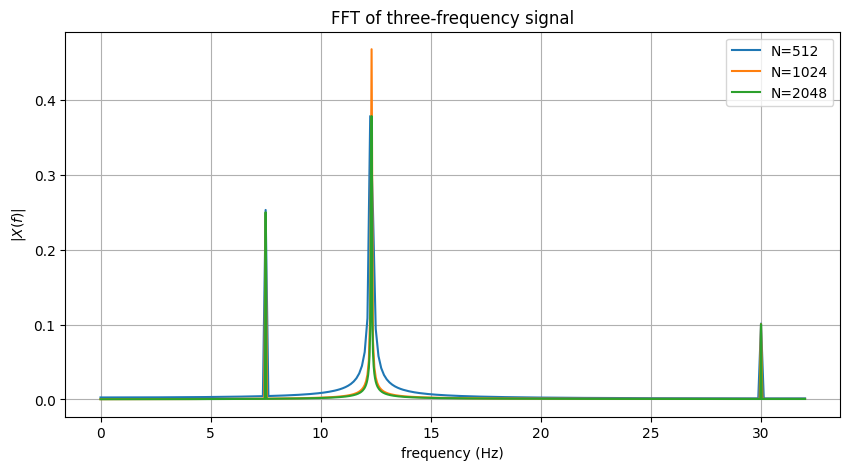

In [9]:
# Exercise 7
def TestData(N, Fs):
    tau = N / Fs
    t = np.linspace(0, tau, N, endpoint=False)

    freqs = [12.3, 7.5, 30.0]
    amps  = [1.0, 0.5, 0.2]

    x = np.zeros_like(t)
    for a, f in zip(amps, freqs):
        x += a * np.cos(2*np.pi*f*t)

    return x

Fs = 64

plt.figure(figsize=(10, 5))
for N in [512, 1024, 2048]:
    x = TestData(N, Fs)
    frq, X = Spectrum1(x, Fs)
    plt.plot(frq, np.abs(X), label=f'N={N}')

plt.title('FFT of three-frequency signal')
plt.xlabel('frequency (Hz)')
plt.ylabel(r'$|X(f)|$')
plt.legend()
plt.grid(True)
plt.show()
